In [29]:
import konlpy
import pandas as pd
import numpy as np 
import re

In [30]:
df = pd.read_csv('data/인스타해시태그_쌀.csv')

In [31]:
df.head()

,dates,tags
0,2021-03-30,"경성미가,쌀,쌀추천,여주쌀,대왕님표여주쌀,진상,자채쌀,가을보석,홈쿡,밥에진심인편,신..."
1,2021-04-11,"오늘은도정일윤기,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미..."
2,2021-03-13,"협찬,포프리,체험박스,3차이벤트,포프리체험박스,계란,두부,쌀,콩나물,올리브유,반숙란..."
3,2021-06-01,"톳나물밥,몸을_가볍게,건강한_한끼,쌀,톳,맛간장,참기름,고춧가루,다진마늘,다진대파,..."
4,2021-07-09,NaN


In [32]:
del df['dates']

In [33]:
df.head()

,tags
0,"경성미가,쌀,쌀추천,여주쌀,대왕님표여주쌀,진상,자채쌀,가을보석,홈쿡,밥에진심인편,신..."
1,"오늘은도정일윤기,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미..."
2,"협찬,포프리,체험박스,3차이벤트,포프리체험박스,계란,두부,쌀,콩나물,올리브유,반숙란..."
3,"톳나물밥,몸을_가볍게,건강한_한끼,쌀,톳,맛간장,참기름,고춧가루,다진마늘,다진대파,..."
4,NaN


In [34]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub(' ', str(text))
    return result

df['ko_text'] = df['tags'].apply(lambda x : text_cleaning(x))
df.head(10)

,tags,ko_text
0,"경성미가,쌀,쌀추천,여주쌀,대왕님표여주쌀,진상,자채쌀,가을보석,홈쿡,밥에진심인편,신...",경성미가 쌀 쌀추천 여주쌀 대왕님표여주쌀 진상 자채쌀 가을보석 홈쿡 밥에진심인편 신...
1,"오늘은도정일윤기,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미...",오늘은도정일윤기 맛있는쌀 맛있는쌀추천 갓도정쌀 강화쌀 강화도쌀 강화섬쌀 교동쌀 백미...
2,"협찬,포프리,체험박스,3차이벤트,포프리체험박스,계란,두부,쌀,콩나물,올리브유,반숙란...",협찬 포프리 체험박스 차이벤트 포프리체험박스 계란 두부 쌀 콩나물 올리브유 반숙란 ...
3,"톳나물밥,몸을_가볍게,건강한_한끼,쌀,톳,맛간장,참기름,고춧가루,다진마늘,다진대파,...",톳나물밥 몸을 가볍게 건강한 한끼 쌀 톳 맛간장 참기름 고춧가루 다진마늘 다진대파 ...
4,NaN,
5,"포프리체험박스,제품협찬포프리체험박스로,포프리쿡,포프리,체험박스,3차이벤트,계란,두부...",포프리체험박스 제품협찬포프리체험박스로 포프리쿡 포프리 체험박스 차이벤트 계란 두부 ...
6,"오늘은도정일오늘,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미...",오늘은도정일오늘 맛있는쌀 맛있는쌀추천 갓도정쌀 강화쌀 강화도쌀 강화섬쌀 교동쌀 백미...
7,"심스아뜰리에,대참사,뚜껑분리,쌀",심스아뜰리에 대참사 뚜껑분리 쌀
8,"따뜻한밥한끼학창,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미...",따뜻한밥한끼학창 맛있는쌀 맛있는쌀추천 갓도정쌀 강화쌀 강화도쌀 강화섬쌀 교동쌀 백미...
9,"점심,오늘의운동,푸드스타그램,다이어트,다이어트식단,체중감량,바디프로필,일기,식단,식...",점심 오늘의운동 푸드스타그램 다이어트 다이어트식단 체중감량 바디프로필 일기 식단 식...


In [35]:
for i in range(len(df['ko_text'])):
    if len(df['ko_text'][i]) == 0:
        df = df.drop(index=i)

In [36]:
from konlpy.tag import Okt
from collections import Counter

In [37]:
stopwords = ['그램','스타','팔로워','선팔','팔로우','판매','반사','오늘','소통','맞팔','더','쌀']

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' 피처에 적용
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(848, 3)


,tags,ko_text,nouns
0,"경성미가,쌀,쌀추천,여주쌀,대왕님표여주쌀,진상,자채쌀,가을보석,홈쿡,밥에진심인편,신...",경성미가 쌀 쌀추천 여주쌀 대왕님표여주쌀 진상 자채쌀 가을보석 홈쿡 밥에진심인편 신...,"[성미, 추천, 여주, 대왕, 표, 여주, 진상, 자채쌀, 가을, 보석, 홈쿡, 밥..."
1,"오늘은도정일윤기,맛있는쌀,맛있는쌀추천,갓도정쌀,강화쌀,강화도쌀,강화섬쌀,교동쌀,백미...",오늘은도정일윤기 맛있는쌀 맛있는쌀추천 갓도정쌀 강화쌀 강화도쌀 강화섬쌀 교동쌀 백미...,"[도, 정일, 윤기, 추천, 도정, 강화, 강화도, 강화, 섬쌀, 교동, 백미, 현..."
2,"협찬,포프리,체험박스,3차이벤트,포프리체험박스,계란,두부,쌀,콩나물,올리브유,반숙란...",협찬 포프리 체험박스 차이벤트 포프리체험박스 계란 두부 쌀 콩나물 올리브유 반숙란 ...,"[협찬, 포프리, 체험, 박스, 차이, 벤트, 포프리, 체험, 박스, 계란, 두부,..."
3,"톳나물밥,몸을_가볍게,건강한_한끼,쌀,톳,맛간장,참기름,고춧가루,다진마늘,다진대파,...",톳나물밥 몸을 가볍게 건강한 한끼 쌀 톳 맛간장 참기름 고춧가루 다진마늘 다진대파 ...,"[톳, 나물, 밥, 몸, 끼, 톳, 맛, 간장, 참기름, 고춧가루, 마늘, 대파, ..."
4,NaN,,[]


In [38]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.

In [39]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [40]:
from collections import Counter

In [41]:
count = Counter(ex_list)
count

Counter({'성미': 1,
         '추천': 54,
         '여주': 12,
         '대왕': 2,
         '표': 14,
         '진상': 1,
         '자채쌀': 1,
         '가을': 4,
         '보석': 2,
         '홈쿡': 6,
         '밥': 157,
         '진심': 1,
         '인편': 1,
         '신혼': 3,
         '밥상': 21,
         '일기': 19,
         '솥밥': 1,
         '식탁': 10,
         '협찬': 9,
         '이마트': 4,
         '백화점': 1,
         '품관': 1,
         '신세계': 2,
         '롯데': 3,
         '갤러리아': 1,
         '요리': 41,
         '봄맞이': 1,
         '도': 8,
         '정일': 2,
         '윤기': 1,
         '도정': 14,
         '강화': 14,
         '강화도': 11,
         '섬쌀': 9,
         '교동': 9,
         '백미': 26,
         '현미': 54,
         '참드': 9,
         '림': 12,
         '신선': 5,
         '주': 14,
         '회도': 6,
         '정': 6,
         '미미': 23,
         '호호': 15,
         '디자인': 4,
         '무공': 6,
         '쌀밥': 20,
         '밥스': 11,
         '덕후': 6,
         '집밥': 44,
         '포프리': 7,
         '체험': 24,
         '박스': 5,
  

In [42]:
words = dict(count.most_common())
words

{'케이크': 388,
 '아침밥': 182,
 '디저트': 181,
 '맛집': 161,
 '밥': 157,
 '천원': 142,
 '베이': 128,
 '킹': 124,
 '건강': 113,
 '일상': 101,
 '라이스': 93,
 '글루텐': 87,
 '프리': 87,
 '카페': 76,
 '이벤트': 75,
 '복숭아': 70,
 '식품': 66,
 '주문': 66,
 '보리차': 64,
 '간식': 63,
 '울산': 56,
 '농부': 56,
 '빵': 55,
 '교육': 55,
 '추천': 54,
 '현미': 54,
 '미소': 54,
 '수제': 53,
 '농림축산식품부': 52,
 '문화': 51,
 '농정원': 50,
 '농림': 49,
 '수산': 49,
 '정보원': 49,
 '곡간': 49,
 '선물': 46,
 '유자': 45,
 '답례': 45,
 '집밥': 44,
 '배즙': 43,
 '즙': 43,
 '과즙': 43,
 '눈': 43,
 '크게': 43,
 '맘': 42,
 '유기': 42,
 '망원동': 42,
 '요리': 41,
 '농사': 41,
 '잡곡': 40,
 '다이어트': 38,
 '우유': 38,
 '마곡': 36,
 '마들렌': 35,
 '파주': 34,
 '벼': 34,
 '고양이': 34,
 '도시락': 34,
 '찹쌀': 33,
 '음식': 32,
 '클래스': 32,
 '유기농': 31,
 '농업': 31,
 '막걸리': 31,
 '육아': 30,
 '쌀암': 30,
 '비건': 29,
 '합정동': 29,
 '금촌': 28,
 '생크림': 28,
 '집': 28,
 '농업인': 28,
 '술': 27,
 '오븐': 27,
 '배송': 27,
 '백미': 26,
 '반찬': 26,
 '푸드': 26,
 '보리': 26,
 '농산물': 25,
 '사과': 25,
 '아기': 25,
 '밀가루': 25,
 '품종': 25,
 '마포구': 25,
 '과일': 25,
 '체험': 24,
 '우리': 24,
 

In [43]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [44]:
import nltk

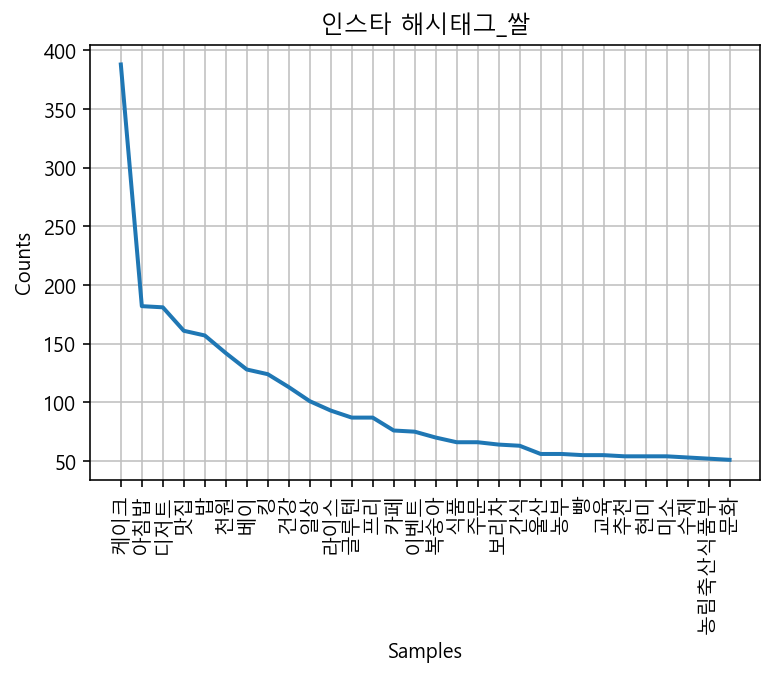

In [48]:
bab = nltk.Text(ex_list)
plt.figure()
plt.title('인스타 해시태그_쌀')
bab.plot(30, 'k')
plt.show()

### 워드클라우드

In [46]:
import wordcloud

#이미지 불러와서 사용할 것
from PIL import Image  

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

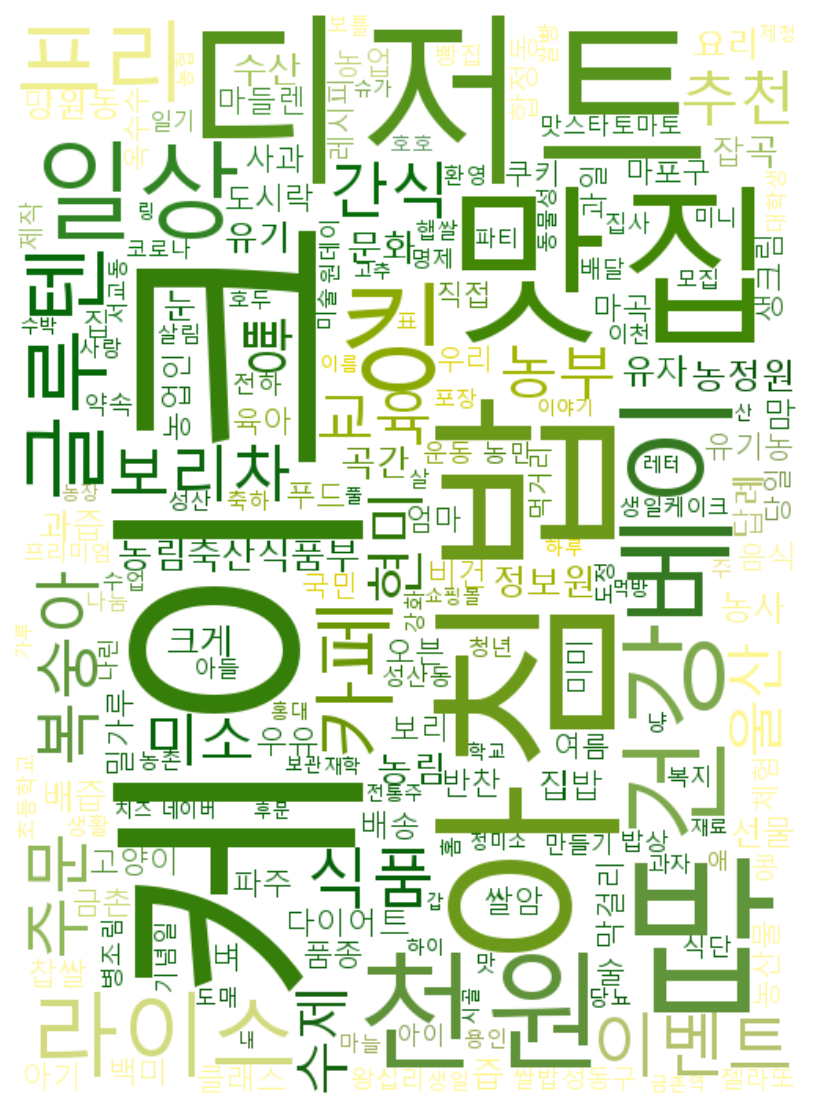

<Figure size 432x288 with 0 Axes>

In [47]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open('image/잘살아보세.png'))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("인스타_쌀_워드클라우드.png") #이미지 파일로 저장